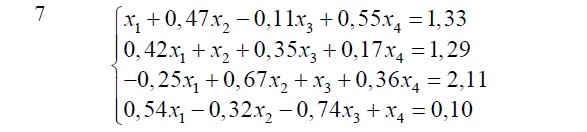

In [ ]:
import numpy as np
A = np.array(([2, 0.47, -0.11, 0.55], [0.42, 1, 0.35, 0.17], [-0.25, 0.67, 2, 0.36], [0.54, -0.32, -0.74, 2]))
b = np.array(([1.33], [1.29], [2.11], [0.10]))

Ответ:

In [ ]:
np.linalg.solve(A, b)

array([[0.43028294],
       [0.77472376],
       [0.78647348],
       [0.3487746 ]])

# Метод Гаусса — Жордана


Зафиксируем сиды, выберем размер матрицы и заполним случайными int в заданом диапазоне, 

переведем тип элементов матрицы в float и найдем длину матрицы - 1

In [ ]:
np.random.seed(1)
size = 5
a = np.hstack((A, b))
print(a)
a = a.astype(np.float32)
n = len(a) - 1

[[ 2.    0.47 -0.11  0.55  1.33]
 [ 0.42  1.    0.35  0.17  1.29]
 [-0.25  0.67  2.    0.36  2.11]
 [ 0.54 -0.32 -0.74  2.    0.1 ]]


Прямой ход:

1) Все элементы первой строки делят на верхний элемент выбранного столбца.

2) Из оставшихся строк вычитают первую строку, умноженную на первый элемент соответствующей строки, с целью получить первым элементом каждой строки (кроме первой) ноль.

3) Далее проводят такую же процедуру с матрицей, получающейся из исходной матрицы после вычёркивания первой строки и первого столбца.

4) После повторения этой процедуры len-1 раз получают верхнюю треугольную матрицу

In [ ]:
for i in range(n+1):
    a[i] = a[i] / a[i, i]
    for k in range(n - i):
        a[k + 1 + i] = a[k + 1 + i] - a[i] * a[k + 1 + i, i]
print(a)

[[ 1.          0.235      -0.055       0.275       0.665     ]
 [ 0.          1.          0.4139576   0.06046822  1.1213802 ]
 [ 0.          0.          1.          0.22835612  0.8661182 ]
 [ 0.          0.          0.          1.          0.34877458]]


Сведем к единичной матрице:

5) Вычитают из предпоследней строки последнюю строку, умноженную на соответствующий коэффициент, с тем, чтобы в предпоследней строке осталась только 1 на главной диагонали.

6)Повторяют предыдущий шаг для последующих строк. В итоге получают единичную матрицу и решение на месте свободного вектора (с ним необходимо проводить все те же преобразования).

In [ ]:
for i in range(n):
    s = 0
    while s < n-i:
        a[s] = a[s] - a[n - i] * a[s, n - i]
        s += 1
print(a)

[[1.         0.         0.         0.         0.430283  ]
 [0.         1.         0.         0.         0.77472377]
 [0.         0.         1.         0.         0.7864734 ]
 [0.         0.         0.         1.         0.34877458]]


Окончательный ответ:

In [ ]:
ans = a[ : ,n + 1]
print(ans)

[0.430283   0.77472377 0.7864734  0.34877458]


# Метод простых итераций

Броблема с b, на выходе из ядра остается непреобразованым

In [ ]:
import numpy as np
from numpy import linalg as la
import sys

A = np.array(([2, 0.47, -0.11, 0.55], [0.42, 1, 0.35, 0.17], [-0.25, 0.67, 2, 0.36], [0.54, -0.32, -0.74, 2]))
b = np.array(([1.33], [1.29], [2.11], [0.10]))
shp = len(A)

if np.linalg.det(A) == 0:
  print('Матрица вырождена')
  sys.exit()
else:
  print('Матрица не вырождена')

B, c =  np.empty([shp, shp]), np.empty([shp, 1])
for i in range(shp):
  B[i, :] = -A[i, :]/A[i, i]
  c[i] = b[i]/A[i, i]
np.fill_diagonal(B, 0)
print(f'норма B = {np.linalg.norm(B)}')

Матрица не вырождена
норма B = 0.9259184629328869


In [ ]:
x, e, bl, check, i = c, 0.001, True, [], 0

while bl: 
  x = np.dot(B, x) + c
  if i > 0:
    _check = la.norm(B)*la.norm(x - _last)/(1-la.norm(B)) 
    bl = (e <= _check)
    check.append(_check)
  _last = x
  i += 1
print(f'Решение сошлось на {i}-ой итерации')
print(x)

Решение сошлось на 10-ой итерации
[[0.43030499]
 [0.77472242]
 [0.78649552]
 [0.34877723]]


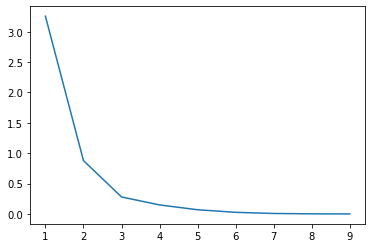

In [ ]:
from matplotlib import pyplot as plt
plt.plot([x+1 for x in range(len(check))], check)